In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('/Users/daniel/Synology Ongoing/HES-Data Science/AC215/project/mlops/data/silver/DGAs.csv', index_col=0, dtype={'is_most_frequent_tld': int})

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30768102 entries, 0 to 30998015
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   domains                object 
 1   isdga                  int64  
 2   actor                  object 
 3   length                 int64  
 4   entropy                float64
 5   TLD                    object 
 6   number_of_vowels       int64  
 7   number_of_consonants   int64  
 8   number_of_numbers      int64  
 9   number_of_specials     int64  
 10  is_most_frequent_tld   int64  
 11  special_combination    object 
 12  meaningful_word_ratio  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 3.2+ GB


In [143]:
RANDOM_SEED = 42

In [144]:
df.head()

,domains,isdga,actor,length,entropy,TLD,number_of_vowels,number_of_consonants,number_of_numbers,number_of_specials,is_most_frequent_tld,special_combination,meaningful_word_ratio
0,zba93jwfmthdo.com,1,shiotob,17,3.852169,com,3,13,2,1,1,.,0.000000
1,thchsnus.xyz,1,locky,12,3.251629,xyz,1,10,0,1,1,.,0.000000
2,viewedhands.com,1,nymaim,15,3.640224,com,5,9,0,1,1,.,0.600000
3,4hmjw5q7w9qr.net,1,qadars,16,3.750000,net,1,14,4,1,1,.,0.187500
4,norduserforum.com,0,legit,17,3.292770,com,6,10,0,1,1,.,0.529412


In [145]:
df.columns

Index(['domains', 'isdga', 'actor', 'length', 'entropy', 'TLD',
       'number_of_vowels', 'number_of_consonants', 'number_of_numbers',
       'number_of_specials', 'is_most_frequent_tld', 'special_combination',
       'meaningful_word_ratio'],
      dtype='object')

In [146]:
response = ['actor']
features = ['length', 'entropy', 
       'number_of_vowels', 'number_of_consonants', 'number_of_numbers',
       'number_of_specials', 'is_most_frequent_tld', 'meaningful_word_ratio']



In [147]:
Y_values = df[response]['actor']
X_values = df[features]

In [148]:
Y_values

0               shiotob
1                 locky
2                nymaim
3                qadars
4                 legit
               ...     
30998011         nymaim
30998012    zeus-newgoz
30998013    proslikefan
30998014          simda
30998015    proslikefan
Name: actor, Length: 30768102, dtype: object

In [149]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_values)
print(le.classes_)
Y_values_le = le.transform(Y_values)


['alureon' 'bedep' 'chinad' 'corebot' 'cryptolocker' 'dircrypt' 'dyre'
 'fobber_v1' 'fobber_v2' 'kraken_v1' 'legit' 'locky' 'matsnu' 'necurs'
 'nymaim' 'padcrypt' 'proslikefan' 'pushdo' 'qadars' 'ramdo' 'ranbyus_v1'
 'ranbyus_v2' 'rovnix' 'shiotob' 'simda' 'sisron' 'symmi' 'tinba'
 'vawtrak_v1' 'zeus-newgoz']


In [150]:
original_labels = list(le.inverse_transform(range(0,30)))

In [151]:
X_train, X_test_val, y_train, y_test_val  = train_test_split(X_values, Y_values_le, random_state=RANDOM_SEED, stratify=Y_values_le, test_size=0.1)

In [152]:
X_test, X_val, y_test, y_val  = train_test_split(X_test_val, y_test_val, random_state=RANDOM_SEED, stratify=y_test_val, test_size=0.5)

## PCA

In [153]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [154]:
import seaborn as sns

# pca = PCA(n_components=3)
# pca.fit(X_train)
# print(pca.explained_variance_ratio_)

In [155]:
le.classes_[y_train]

array(['fobber_v2', 'simda', 'legit', ..., 'ramdo', 'padcrypt',
       'cryptolocker'], dtype=object)

In [156]:
data = X_test.copy()
data['actor'] = y_test

In [157]:
X_test_scaled = StandardScaler().fit_transform(X_test)  # fits scaler on the whole dataset


In [158]:
# PCA transformation with n_components = 2
pca = PCA(n_components=3)
pca.fit(X_test_scaled)

X_transformed = pca.transform(X_test_scaled)
X_transformed.shape

(1538405, 3)

In [159]:
print(pca.explained_variance_ratio_)

[0.39131794 0.22122931 0.12979103]


In [160]:
data['PCA1'] = X_transformed[:,0]
data['PCA2'] = X_transformed[:,1]
display(data.head())


,length,entropy,number_of_vowels,number_of_consonants,number_of_numbers,number_of_specials,is_most_frequent_tld,meaningful_word_ratio,actor,PCA1,PCA2
3287134,37,4.087568,7,29,19,1,1,0.0000,6,6.214788,0.004242
14081536,14,3.378783,2,11,0,1,1,0.0000,0,-0.967329,-1.706526
4787341,16,3.577820,2,13,0,1,1,0.1875,4,-0.425225,-1.106094
16915246,37,4.046763,2,34,25,1,0,0.0000,6,7.196315,-1.360217
10875689,32,4.140320,3,28,13,1,1,0.1250,29,4.902852,-0.796905


In [161]:
data['actor_name'] = data.actor.apply(lambda row: le.classes_[row])
data

,length,entropy,number_of_vowels,number_of_consonants,number_of_numbers,number_of_specials,is_most_frequent_tld,meaningful_word_ratio,actor,PCA1,PCA2,actor_name
3287134,37,4.087568,7,29,19,1,1,0.000000,6,6.214788,0.004242,dyre
14081536,14,3.378783,2,11,0,1,1,0.000000,0,-0.967329,-1.706526,alureon
4787341,16,3.577820,2,13,0,1,1,0.187500,4,-0.425225,-1.106094,cryptolocker
16915246,37,4.046763,2,34,25,1,0,0.000000,6,7.196315,-1.360217,dyre
10875689,32,4.140320,3,28,13,1,1,0.125000,29,4.902852,-0.796905,zeus-newgoz
...,...,...,...,...,...,...,...,...,...,...,...,...
17043124,22,3.243300,8,13,0,1,0,0.636364,14,-0.632122,2.308414,nymaim
1747175,17,3.410417,5,11,1,1,1,0.000000,25,-0.494613,-0.761921,sisron
1252708,16,3.500000,6,9,0,1,0,0.812500,10,-1.387536,2.044571,legit
11637995,17,3.337175,5,11,0,1,1,0.000000,1,-0.708377,-0.740242,bedep


In [162]:
data['actor'] = data['actor'].astype("category")

In [163]:
data.sample(1000)

,length,entropy,number_of_vowels,number_of_consonants,number_of_numbers,number_of_specials,is_most_frequent_tld,meaningful_word_ratio,actor,PCA1,PCA2,actor_name
27926666,17,3.616875,4,12,1,1,1,0.352941,23,-0.346514,-0.061091,shiotob
22202358,21,3.916127,6,14,0,1,1,0.428571,7,0.496118,0.918290,fobber_v1
1666791,14,3.521641,2,11,0,1,1,0.000000,0,-0.774471,-1.691724,alureon
6438021,20,3.784184,6,13,0,1,1,0.300000,11,0.203094,0.518916,locky
5541225,20,3.684184,5,14,0,1,1,0.300000,11,0.158452,0.217010,locky
...,...,...,...,...,...,...,...,...,...,...,...,...
22019684,21,4.011365,4,16,4,1,1,0.142857,2,1.443843,-0.558039,chinad
12617775,21,3.844233,3,16,5,2,1,0.142857,3,1.423439,0.042992,corebot
25274546,25,3.973661,5,18,0,2,1,0.560000,3,1.363435,2.061392,corebot
19858432,18,3.572431,6,11,0,2,0,0.500000,14,-0.600487,2.188723,nymaim


<Axes: xlabel='PCA1', ylabel='PCA2'>

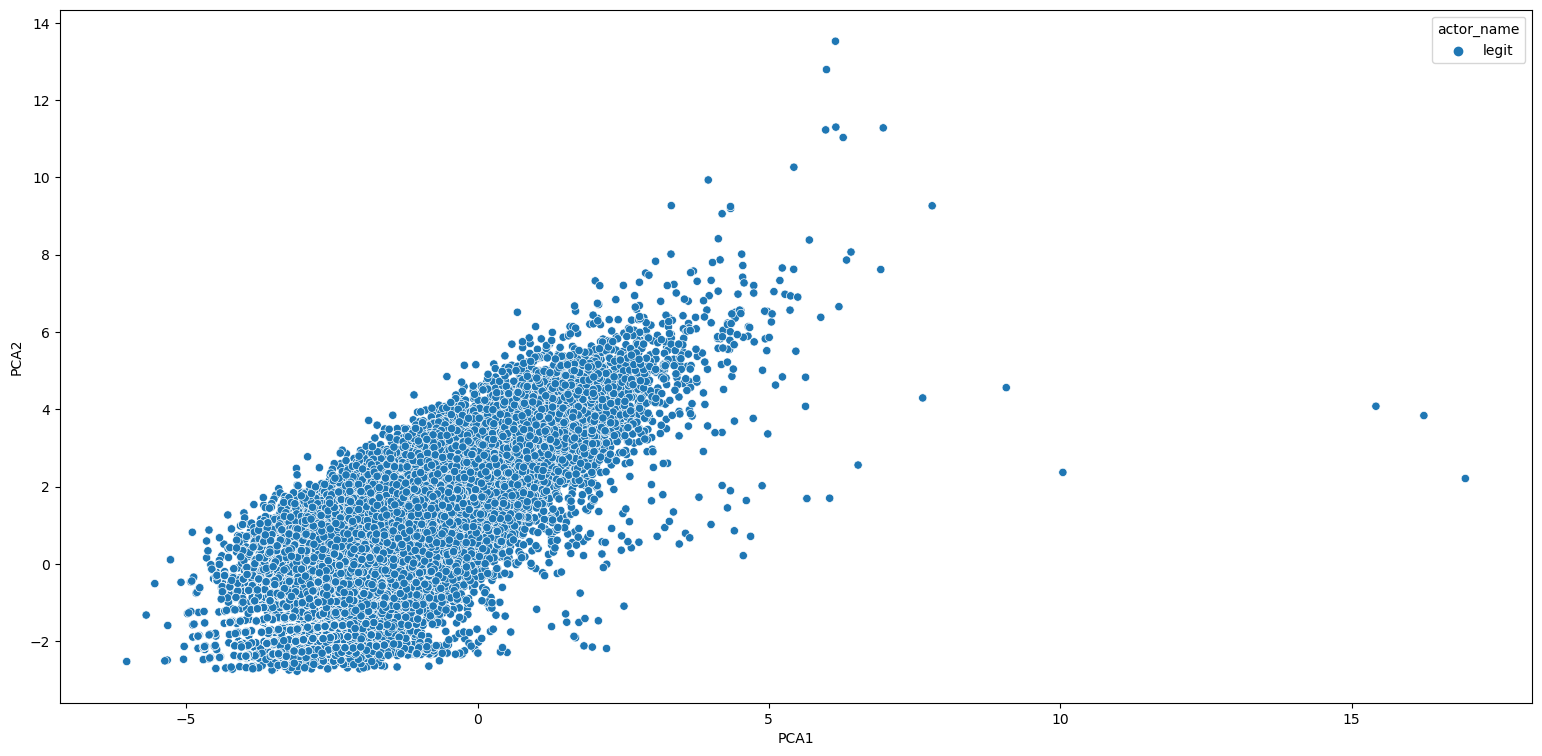

In [164]:
plt.figure(figsize=(19, 9))
sns.scatterplot(data=data[data['actor_name'] =='legit'], x='PCA1', y='PCA2', hue='actor_name')


<Axes: xlabel='PCA1', ylabel='PCA2'>

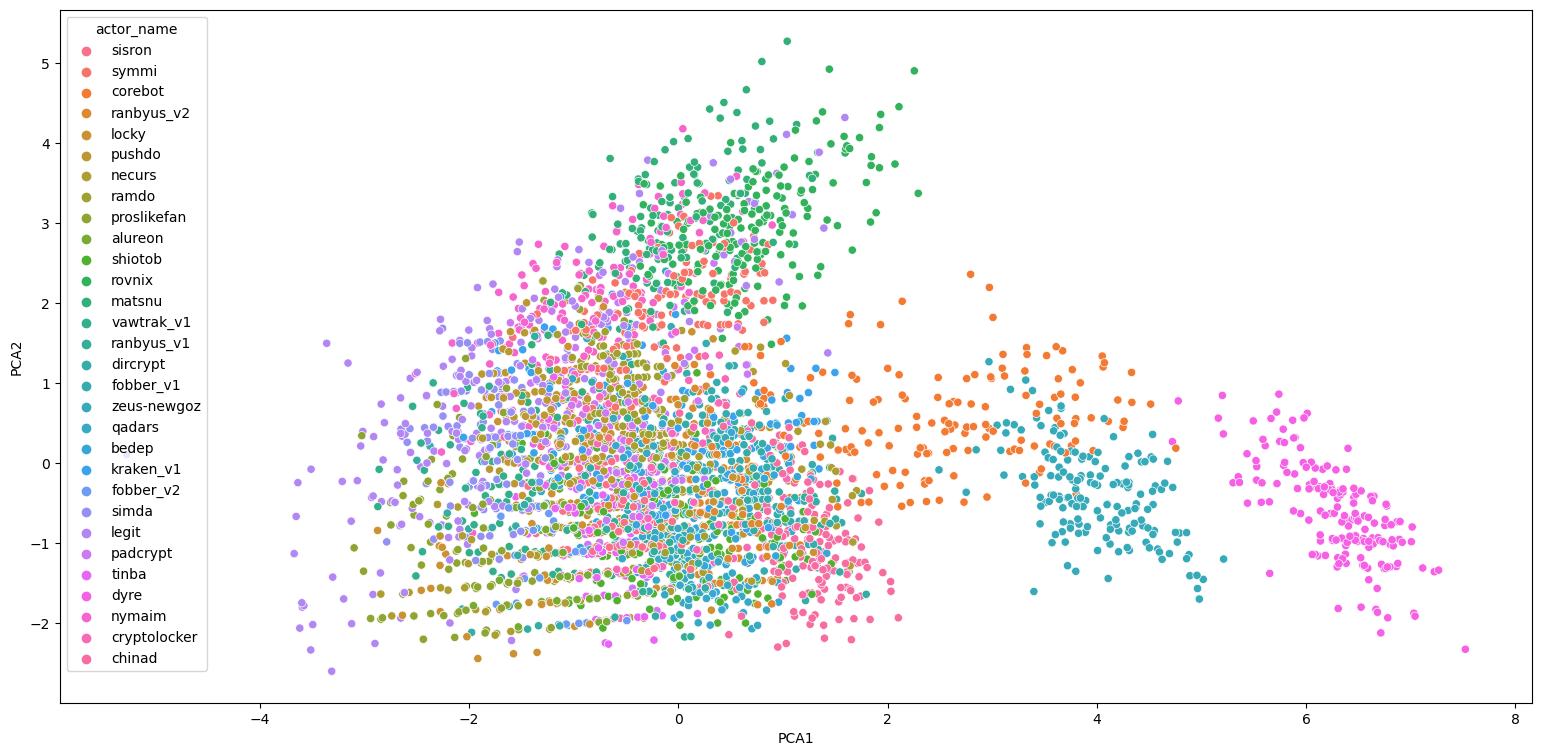

In [165]:
plt.figure(figsize=(19, 9))
sns.scatterplot(data=data.sample(5_000), x='PCA1', y='PCA2', hue='actor_name')


In [166]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [167]:
y_pred = clf.predict(X_test)

In [168]:
from sklearn.metrics import f1_score

f1_score_per_class = f1_score(y_test, y_pred, average=None)

In [170]:
results = pd.DataFrame.from_dict(dict(zip(le.classes_, f1_score_per_class)), orient='index').sort_values(by=0, ascending=False)
results.columns = ['F1_score']
results

,F1_score
dyre,1.000000
zeus-newgoz,0.999910
corebot,0.995703
rovnix,0.960245
symmi,0.951626
chinad,0.915930
kraken_v1,0.911728
qadars,0.888142
matsnu,0.879030
fobber_v1,0.840267


In [171]:
len(f1_score(y_test, y_pred, average=None))

30

In [172]:
df[['isdga', 'actor']].isna().sum()

isdga    0
actor    0
dtype: int64

In [173]:
df[df['actor'].isna()]['isdga'].sum()

0

In [174]:
train, test_val = train_test_split(df, random_state=RANDOM_SEED, stratify=df[['actor']], test_size=0.1)

In [175]:
test, val = train_test_split(test_val, random_state=RANDOM_SEED, stratify=test_val[['actor']], test_size=0.5)

In [176]:
train.shape, test.shape, val.shape

((27691291, 13), (1538405, 13), (1538406, 13))

In [177]:
train

,domains,isdga,actor,length,entropy,TLD,number_of_vowels,number_of_consonants,number_of_numbers,number_of_specials,is_most_frequent_tld,special_combination,meaningful_word_ratio
3858642,pidblhivzf.com,1,fobber_v2,14,3.664498,com,3,10,0,1,1,.,0.000000
4554772,cituvekubyr.eu,1,simda,14,3.324863,eu,6,7,0,1,1,.,0.214286
19984589,minori.it,0,legit,9,2.641604,it,4,4,0,1,0,.,0.333333
20688490,number-size-computer.com,1,matsnu,24,3.772055,com,8,15,0,3,1,--.,0.625000
2872397,roland-hire.uz,1,nymaim,14,3.664498,uz,5,8,0,2,0,-.,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293321,ghfyjzebkh.net,1,proslikefan,14,3.521641,net,2,11,0,1,1,.,0.214286
22258652,ycbnuqafabiidnjgejtc.com,1,dircrypt,24,3.970176,com,7,16,0,1,1,.,0.000000
12938939,mygasooksceeawqk.org,1,ramdo,20,3.584184,org,7,12,0,1,1,.,0.300000
26454799,lnlkoconafalkbob.co,1,padcrypt,19,3.050302,co,6,12,0,1,0,.,0.473684


In [178]:
df.actor.unique()

array(['shiotob', 'locky', 'nymaim', 'qadars', 'legit', 'kraken_v1',
       'dircrypt', 'ramdo', 'proslikefan', 'chinad', 'dyre', 'fobber_v1',
       'corebot', 'alureon', 'zeus-newgoz', 'simda', 'sisron', 'bedep',
       'necurs', 'vawtrak_v1', 'fobber_v2', 'rovnix', 'pushdo', 'symmi',
       'matsnu', 'padcrypt', 'ranbyus_v1', 'tinba', 'ranbyus_v2',
       'cryptolocker'], dtype=object)